<h1 align=center><font size=5>Intermediate Macroeconomics</font></h1>
<h1 align=center><font size=4>Data Exercise 2</font></h1>

 <p><b>Name</b>: Salomon Ruiz                   </p>
 <p><b>NetID</b>: srh450                 </p>
 <p><b>Country</b>: Italy                 </p>



#### Data

For this exercise, all the data series analyzed were obtained from the Fred database. The table below shows the different data series used and their respective units and labels.   

| Data | Units | Label |
| :- | :- | :- |
| Real GDP at Constant National Prices for Italy | Millions of 2017 U.S. Dollars | RGDPNAITA666NRUG |
| Gross Domestic Product for Italy | Current U.S. Dollars | MKTGDPITA646NWDB |
| Consumer Price Index of All Items in Italy | Index 2015=100 | ITACPIALLMINMEI |
| Adjusted Unemployment Rate in Italy| Percent | ITAURNAA |
| M2 for Italy  | National Currency | MYAGM2ITM189N |
| Spot Crude Oil Price: West Texas Intermediate | Dollars per Barrel | WTISPLC |

The range of our data goes from 1974 to 2012, except for M2 for Italy since the data was only available up to 1998. For real GDP, nominal GDP and unemployment rate only yearly data was available. For the other series, the average over four quarters was used in the computations of this exercise. In order to calculate the GDP deflator, real GDP was multiplied by 1 million to match the units to those of nominal GDP. 

In [176]:
import pandas as pd; import numpy as np; import matplotlib as mpl; import matplotlib.pyplot as plt; 
import statsmodels.formula.api as smf; import statsmodels.api as sm
%matplotlib inline 

#### Question 1

In [177]:
df = pd.read_csv('data1.csv'); df2 = pd.read_csv('data2.csv')
df = df.rename(columns = {'MKTGDPITA646NWDB':'gdp','RGDPNAITA666NRUG':'real_gdp', 'ITAURNAA':'unrate'}, inplace = False)
df2 = df2.rename(columns = {'MYAGM2ITM189N':'money_supply','ITACPIALLMINMEI':'cpi', 'WTISPLC':'poil'}, inplace = False)
df['DATE'] = pd.to_datetime(df['DATE']); df2['DATE'] = pd.to_datetime(df2['DATE']); df2 = df2.replace('.',np.NaN); 
df2['money_supply'] = df2['money_supply'].astype(float); df['cpi'] = df2['cpi'].groupby(df2.index / 4).mean()
df['poil'] = df2['poil'].groupby(df2.index / 4).mean(); df['money_supply'] = df2['money_supply'].groupby(df2.index / 4).mean()
df['pct_change_rgdp'] = df['real_gdp'].pct_change()*100; df['pct_change_unrate'] = df['unrate'].pct_change()*100
df.head()

,DATE,gdp,real_gdp,unrate,cpi,poil,money_supply,pct_change_rgdp,pct_change_unrate
0,1974-01-01,1.995640e+11,1302745.750,3.1,7.641165,10.110000,NaN,NaN,NaN
1,1975-01-01,2.276960e+11,1275516.375,3.4,9.364024,11.160000,9.596530e+13,-2.090153,9.677419
2,1976-01-01,2.247170e+11,1366401.750,3.9,10.507548,11.763333,1.206240e+14,7.125379,14.705882
3,1977-01-01,2.575960e+11,1401388.375,4.1,12.635423,13.900000,1.444300e+14,2.560493,5.128205
4,1978-01-01,3.150580e+11,1446795.375,4.1,14.261652,14.850000,1.760650e+14,3.240144,0.000000


                            OLS Regression Results                            
Dep. Variable:        pct_change_rgdp   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3.725
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0615
Time:                        13:40:01   Log-Likelihood:                -82.092
No. Observations:                  38   AIC:                             168.2
Df Residuals:                      36   BIC:                             171.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8898      0.37

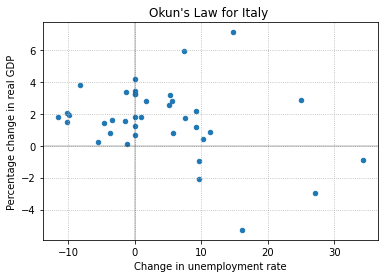

In [178]:
ax = df.plot(x ='pct_change_unrate', y='pct_change_rgdp' , kind = 'scatter', title = 'Okun\'s Law for Italy ')
ax.set_ylabel("Percentage change in real GDP"), ax.set_xlabel("Change in unemployment rate"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); ax.axvline(x=0, color='k', linewidth= 0.3)
okunslaw = smf.ols('pct_change_rgdp ~ pct_change_unrate', df).fit(); print(okunslaw.summary())

According to our regression, Okun's law for Italy is $\Delta Y/Y = 1.89 - 0.07\Delta$u, which means if there is no change in the unemployment rate, real GDP would increase by 1.89%. However, if the unemployment rate increases by 1%, then real GDP growth would decrease by 0.07%. If we compare these parameter estimates to the US estimates in the textbook, where $\Delta Y/Y = 3 - 2\Delta$u, we can see with the unemployment rate unchanged, there is higher growth in real GDP in the US than in Italy. On the other hand, if the unemployment rate rises by one percentage point, the US real GDP growth is significantly affected since it would fall by 2%, which is a higher decrease than in Italy. A potential reason that explains this difference in the parameter estimates could be the fact unemployment rate in Italy has increased during this time frame to around 10%, while in the US it has fluctuated approximately between 4 and 7%. Therefore, a change in the unemployment rate can have a bigger impact on the US real GDP growth, since they have kept a relatively low unemployment rate.   


                            OLS Regression Results                            
Dep. Variable:        pct_change_rgdp   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.158
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.297
Time:                        13:40:02   Log-Likelihood:                -40.571
No. Observations:                  19   AIC:                             85.14
Df Residuals:                      17   BIC:                             87.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7724      0.60

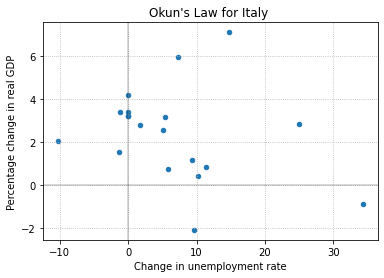

In [179]:
sub1 = df.loc[df.index <= 19]; ax = sub1.plot(x ='pct_change_unrate', y='pct_change_rgdp' , kind = 'scatter', title = 'Okun\'s Law for Italy ')
ax.set_ylabel("Percentage change in real GDP"), ax.set_xlabel("Change in unemployment rate"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); ax.axvline(x=0, color='k', linewidth= 0.3)
okunslaw1 = smf.ols('pct_change_rgdp ~ pct_change_unrate', sub1).fit(); print(okunslaw1.summary())

                            OLS Regression Results                            
Dep. Variable:        pct_change_rgdp   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     13.75
Date:                Thu, 22 Apr 2021   Prob (F-statistic):            0.00175
Time:                        13:40:02   Log-Likelihood:                -34.612
No. Observations:                  19   AIC:                             73.22
Df Residuals:                      17   BIC:                             75.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9935      0.36

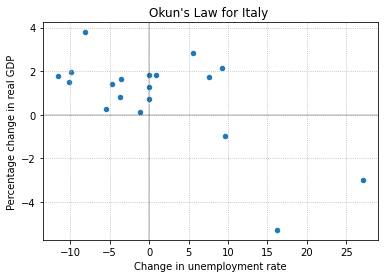

In [180]:
sub2 = df.loc[df.index > 19]; ax = sub2.plot(x ='pct_change_unrate', y='pct_change_rgdp' , kind = 'scatter', title = 'Okun\'s Law for Italy ')
ax.set_ylabel("Percentage change in real GDP"), ax.set_xlabel("Change in unemployment rate"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); ax.axvline(x=0, color='k', linewidth= 0.3)
okunslaw2 = smf.ols('pct_change_rgdp ~ pct_change_unrate', sub2).fit(); print(okunslaw2.summary())

After dividing the sample into two subperiods, we notice the change in unemployment rate seems to have a bigger effect on real GDP growth during the second period since it makes it fall by 0.14% compared to 0.05% in the first subperiod. Moreover, the R-square is also considerably higher during the second period with 44.7% compared to only 6.4%, which means our model is better at explaining the second subperiod.  We can also see from the scatter plots that the points are less dispersed in the second subperiod and they seem to follow a stronger relationship between the change in real GDP and the change in the unemployment rate. If we plot real GDP growth and the change in the unemployment rate, we realize at the beginning of our sample, during the ’70s, there are times in which both the unemployment rate and real GDP growth increase, so this might explain the difference between the two subperiods.    

Text(0, 0.5, 'Percent')

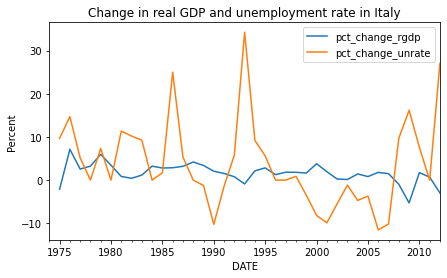

In [181]:
ax = df.plot(x ='DATE', y=['pct_change_rgdp', 'pct_change_unrate'], kind = 'line', figsize=(7,4), title = 'Change in real GDP and unemployment rate in Italy')
ax.set_ylabel("Percent")

#### Question 2

(Text(0, 0.5, 'CPI growth rate'), Text(0.5, 0, 'Unemployment rate'), None)

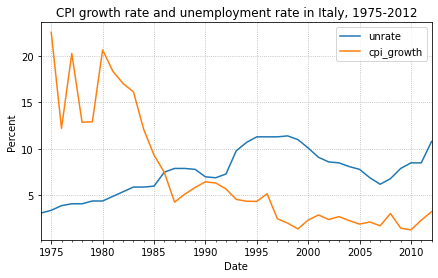

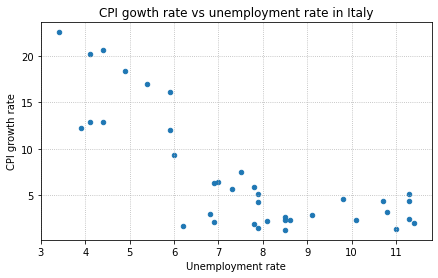

In [182]:
df['cpi_growth'] =  df['cpi'].pct_change()*100
ax = df.plot(x ='DATE', y=['unrate', 'cpi_growth'], kind = 'line', figsize=(7,4), title= 'CPI growth rate and unemployment rate in Italy, 1975-2012')
ax.set_ylabel("Percent"), ax.set_xlabel("Date"), ax.grid(linestyle=':')
ax = df.plot(x ='unrate', y='cpi_growth' , kind = 'scatter', figsize=(7,4), title='CPI gowth rate vs unemployment rate in Italy' )
ax.set_ylabel("CPI growth rate"), ax.set_xlabel("Unemployment rate"), ax.grid(linestyle=':')

#### Question 3

In [183]:
phillips = smf.ols('cpi_growth ~ unrate', df).fit()
print(phillips.summary())

                            OLS Regression Results                            
Dep. Variable:             cpi_growth   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     51.62
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.88e-08
Time:                        13:40:03   Log-Likelihood:                -106.21
No. Observations:                  38   AIC:                             216.4
Df Residuals:                      36   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6368      2.261     10.013      0.0

In [184]:
df.corr().loc['cpi_growth', 'unrate']

-0.7675425716898272

The estimated Phillips curve we get is $\Delta CPI = 22.63 - 2.04\Delta$UR, so we can see there is a clear tradeoff between the unemployment rate and inflation. With an unemployment rate equal to zero, inflation would increase by around 22.63%, but as the unemployment rate increases by 1%, inflation falls by 2.04%. Therefore, the estimated $\beta$1 has the expected sign. By further calculating the correlation coefficient between the two series, we find there is a strong negative correlation between unemployment and inflation since the coefficient is -0.77. 

#### Question 4

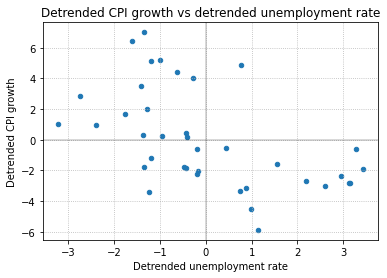

In [185]:
df2 = df.iloc[1:]; cycle, trend = sm.tsa.filters.hpfilter(df2['unrate'], 100000); cycle2, trend2 = sm.tsa.filters.hpfilter(df2['cpi_growth'], 100000) 
df2["detrended_unemployment_rate"] = cycle; df2["detrended_cpi_growth"] = cycle2
ax = df2.plot(x ='detrended_unemployment_rate', y='detrended_cpi_growth' , kind = 'scatter', title='Detrended CPI growth vs detrended unemployment rate')
ax.set_ylabel("Detrended CPI growth"), ax.set_xlabel("Detrended unemployment rate"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); ax.axvline(x=0, color='k', linewidth= 0.3)

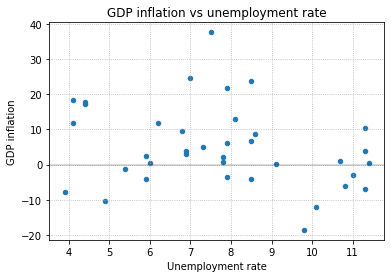

In [186]:
df2['real_gdp'] = df2['real_gdp']*1000000; df2['gdp_deflator'] = (df2['gdp']/df2['real_gdp'])*100
df2['gdp_inflation'] = df2['gdp_deflator'].pct_change()*100; ax = df2.plot(x ='unrate', y='gdp_inflation' , kind = 'scatter', title = 'GDP inflation vs unemployment rate')
ax.set_ylabel("GDP inflation"), ax.set_xlabel("Unemployment rate"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); 

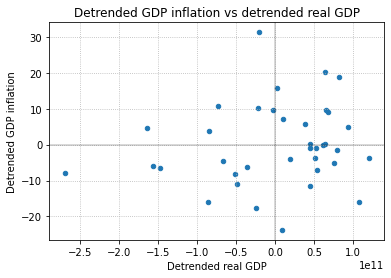

In [187]:
df3 = df2.iloc[1:]; cycle, trend = sm.tsa.filters.hpfilter(df3['real_gdp'], 100000); 
cycle2, trend2 = sm.tsa.filters.hpfilter(df3['gdp_inflation'], 100000) ; df3["detrended_real_gdp"] = cycle;  df3["detrended_gdp_inflation"] = cycle2
ax = df3.plot(x ='detrended_real_gdp', y='detrended_gdp_inflation' , kind = 'scatter', title = 'Detrended GDP inflation vs detrended real GDP')
ax.set_ylabel("Detrended GDP inflation"), ax.set_xlabel("Detrended real GDP"), ax.grid(linestyle=':')
ax.axhline(y=0, color='k', linewidth= 0.3); ax.axvline(x=0, color='k', linewidth= 0.3)

Out of the three scatter plots above, the first one between the detrended growth of CPI and the detrended unemployment rate suggests a strong relationship between the series. 


#### Question 5 

In [188]:
sub1 = df.loc[df.index <= 19]; phillips1 = smf.ols('cpi_growth ~ unrate', sub1).fit(); print(phillips1.summary())

                            OLS Regression Results                            
Dep. Variable:             cpi_growth   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     43.68
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           4.43e-06
Time:                        13:40:04   Log-Likelihood:                -48.642
No. Observations:                  19   AIC:                             101.3
Df Residuals:                      17   BIC:                             103.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2445      2.777     10.530      0.0

In [189]:
sub1.corr().loc['cpi_growth', 'unrate']

-0.8484374097323797

In [190]:
sub2 = df.loc[df.index > 19]; phillips2 = smf.ols('cpi_growth ~ unrate', sub2).fit(); print(phillips2.summary())

                            OLS Regression Results                            
Dep. Variable:             cpi_growth   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4.745
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0437
Time:                        13:40:04   Log-Likelihood:                -25.130
No. Observations:                  19   AIC:                             54.26
Df Residuals:                      17   BIC:                             56.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0110      1.226     -0.009      0.9

In [191]:
sub2.corr().loc['cpi_growth', 'unrate']

0.4671322731893158


After splitting our sample into two subsamples, we find a stronger Phillips curve in the first half since $\beta$1 = -2.92 and R-square is 72%, which is significantly higher than the results obtained in Question 3. Furthermore, the correlation coefficient between the two series in the first half is -0.85, so there is a stronger correlation between unemployment and inflation in the first half of our sample. Surprisingly, our second subsample shows a positive but weaker correlation between the two series, which is the opposite of what the Phillips curve states, but the R-square is only 21.8%.  


#### Question 6

In [192]:
df['pct_change_poil'] = df['poil'].pct_change()*100; phillipsoil = smf.ols('cpi_growth ~ unrate + pct_change_poil ', df).fit()
print(phillipsoil.summary())

                            OLS Regression Results                            
Dep. Variable:             cpi_growth   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     25.12
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.72e-07
Time:                        13:40:04   Log-Likelihood:                -106.19
No. Observations:                  38   AIC:                             218.4
Df Residuals:                      35   BIC:                             223.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.5791      2.321     

After running this regression which includes the change in oil prices, we can see the relationship between unemployment and inflation is still negative and the coefficient is almost the same, which was expected. The coefficient for the change in oil prices is positive but it is small and statistically insignificant ( p-value > 0.05 and t-statistic small).  Moreover, R-square is basically the same, so there is no increase in explanatory power after including the change in oil prices. The effect of change in oil prices on CPI growth is negligible. 

#### Question 7

In [193]:
df['real_gdp'] = df['real_gdp']*1000000
df['gdp_deflator'] = (df['gdp']/df['real_gdp'])*100
df['pct_change_deflator'] = df['gdp_deflator'].pct_change()*100
df['lagged_change_deflator'] = df['pct_change_deflator'].shift(+1)

In [194]:
deflchange = smf.ols('pct_change_deflator ~ unrate + lagged_change_deflator ', df).fit()
print(deflchange.summary())

                             OLS Regression Results                            
Dep. Variable:     pct_change_deflator   R-squared:                       0.093
Model:                             OLS   Adj. R-squared:                  0.039
Method:                  Least Squares   F-statistic:                     1.737
Date:                 Thu, 22 Apr 2021   Prob (F-statistic):              0.191
Time:                         13:40:22   Log-Likelihood:                -140.70
No. Observations:                   37   AIC:                             287.4
Df Residuals:                       34   BIC:                             292.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

We can see from the regression results that $\beta$1 is statistically insignificant since it has a small t-stat and a big p-value. Moreover, this model only explains 9.3% of the changes in the GDP deflator, so the hypothesis that the unemployment rate affects not inflation itself, but the change in inflation can be rejected. Additionally, we can see that the lagged change in GDP deflator is also insignificant and $\beta$2 is different from 1. By plotting the GDP deflator, we can see it has fluctuated a lot during the time period of our data set, so past inflation might not be a good estimator of current inflation for Italy during this time frame. 

(Text(0, 0.5, 'GDP deflator'), Text(0.5, 0, 'Date'), None)

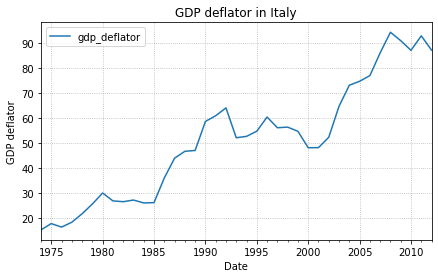

In [204]:
ax = df.plot(x ='DATE', y=['gdp_deflator'], kind = 'line', figsize=(7,4), title = 'GDP deflator in Italy')
ax.set_ylabel("GDP deflator"), ax.set_xlabel("Date"), ax.grid(linestyle=':')

#### Question 8

In [199]:
df['lagged_unrate'] = df['unrate'].shift(+1)
defllagunr = smf.ols('pct_change_deflator ~ unrate + lagged_unrate ', df).fit()
print(defllagunr.summary())

                             OLS Regression Results                            
Dep. Variable:     pct_change_deflator   R-squared:                       0.113
Model:                             OLS   Adj. R-squared:                  0.062
Method:                  Least Squares   F-statistic:                     2.220
Date:                 Thu, 22 Apr 2021   Prob (F-statistic):              0.124
Time:                         13:58:05   Log-Likelihood:                -144.09
No. Observations:                   38   AIC:                             294.2
Df Residuals:                       35   BIC:                             299.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.3337      6.213 

According to our results, lagged unemployment rate seems to have a smaller effect on inflation than the current unemployment rate, so including it in our model does not bring a big increase in explanatory power. $\beta$1 +  $\beta$2 is different from zero, otherwise adding the two variables to our model would have no effect on inflation. A reason why lagged unemployment does not add much explanatory power could be the fact that the unemployment rate affects inflation mostly in the short run. 


#### Question 9

After running all these “experiments”, the subsample that shows the strongest Phillips curve is the first subsample of question 5, which has an R-square of 72%, and where unemployment rate is the only predictor of inflation. During this time period we can see the tradeoff between unemployment and inflation was clear, as inflation was at high levels while the unemployment rate was low. In the second subsample this tradeoff holds but seems less strong.    

#### Question 10

In [202]:
df['change_money'] = df['money_supply'].pct_change()*100
df['lagged_money'] = df['change_money'].shift(+1)
reg = smf.ols('cpi_growth ~ unrate + pct_change_poil+ change_money + lagged_money ', df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             cpi_growth   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     31.52
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.61e-10
Time:                        14:03:28   Log-Likelihood:                -84.586
No. Observations:                  36   AIC:                             179.2
Df Residuals:                      31   BIC:                             187.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7481      2.878     

 $\beta$3 and  $\beta$4 have an expected positive sign as printing more money generate inflation. 
Money growth does contribute much to explaining inflation and lagged money growth is in fact the variable with the highest t-statistic. Since prices are sticky in the short run, inflation does not increase right away but it takes a while. This is why the lagged money growth is a better estimator to predict inflation.  We can see that out of all the previous Phillips curve models, this one has the highest R-square, 80.3%, so it is really good at explaining inflation variations in Italy.   


#### Sources:
https://fred.stlouisfed.org/

In [203]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width:0px; min-width:0px; visibility: collapse}</style>')) 
import warnings
warnings.filterwarnings('ignore')